In [ ]:
!pip install web3 opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.5/587.5 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 87.6 MB/s eta 0:00:00


In [ ]:
import hashlib
import datetime
from PIL import Image, ImageChops, ExifTags
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Generate hash of a file (used later for blockchain logging)
def compute_sha256(file_path):
    sha256_hash = hashlib.sha256()
    with open(file_path, "rb") as f:
        for byte_block in iter(lambda: f.read(4096), b""):
            sha256_hash.update(byte_block)
    return sha256_hash.hexdigest()

# Display images inline
def show_image(img_path, title='Image'):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


# **Step 1**

In [ ]:
class LightweightDeepfakeDetector:
    def __init__(self, image_path):
        self.image_path = image_path
        self.suspicious = False
        self.metadata = {}

    def extract_metadata(self):
        try:
            image = Image.open(self.image_path)
            exif_data = image._getexif()
            if exif_data:
                for tag_id, value in exif_data.items():
                    tag = ExifTags.TAGS.get(tag_id, tag_id)
                    self.metadata[tag] = value
            else:
                print("⚠️ No EXIF metadata found.")
                self.suspicious = True
        except Exception as e:
            print(f"Metadata extraction failed: {e}")
            self.suspicious = True

        if self.metadata:
            for key, value in self.metadata.items():
                if isinstance(value, str) and any(tool in value.lower() for tool in ['photoshop', 'gimp']):
                    print(f" - Edited with suspicious software: {value}")
                    self.suspicious = True

    def perform_ela(self, quality=90):
        temp_path = "temp_ela.jpg"
        original = Image.open(self.image_path).convert('RGB')
        original.save(temp_path, 'JPEG', quality=quality)
        ela_image = Image.open(temp_path)
        diff = ImageChops.difference(original, ela_image)
        diff = diff.point(lambda x: x * 10)
        diff.save("ela_output.jpg")
        show_image("ela_output.jpg", title="ELA Visualization")

    def check_brightness_variance(self):
        img = cv2.imread(self.image_path, cv2.IMREAD_GRAYSCALE)
        brightness = np.mean(img)
        variance = np.var(img)
        print(f"💡 Brightness: {brightness:.2f}, Variance: {variance:.2f}")
        if brightness < 50 or variance > 2000:
            self.suspicious = True

    def run(self):
        print("🔍 Stage 1: Running Lightweight Detection...\n")
        self.extract_metadata()
        print("\n🖼️ Running ELA...")
        self.perform_ela()
        print("\n📊 Checking brightness and variance...")
        self.check_brightness_variance()
        print("\n🚦 Final Verdict (Stage 1):")
        if self.suspicious:
            print("⚠️ Suspicious content detected. Proceed to Stage 2.")
        else:
            print("✅ Media appears clean.")
        return self.suspicious


🔍 Stage 1: Running Lightweight Detection...

 - Edited with suspicious software: GIMP 2.4.5

🖼️ Running ELA...


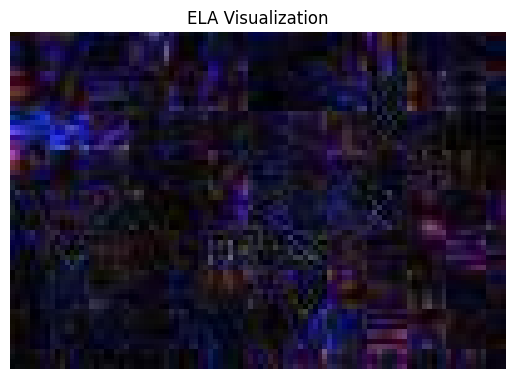


📊 Checking brightness and variance...
💡 Brightness: 72.69, Variance: 1614.59

🚦 Final Verdict (Stage 1):
⚠️ Suspicious content detected. Proceed to Stage 2.


In [ ]:
detector = LightweightDeepfakeDetector("/content/Canon_40D.jpg")
suspicious = detector.run()


# **Step 2**

In [ ]:
# -------------------------------
# 📦 Step 1: Upload & Unzip
# -------------------------------
from google.colab import files
import zipfile, os

# Upload zip manually
uploaded = files.upload()

# Extract zip to /content
for filename in uploaded.keys():
    zip_path = f"/content/{filename}"
    extract_path = "/content/deepfake_project"
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Confirm contents
print("Extracted folders:", os.listdir(extract_path))

Saving Deepfake-detection.zip to Deepfake-detection.zip
Extracted folders: ['Deepfake-detection']


In [ ]:
# -------------------------------
# 🔧 Step 2: Define MesoNet Model
# -------------------------------
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, AveragePooling2D, Flatten, Dense

def Meso4():
    x = Input(shape=(256, 256, 3))
    y = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
    y = BatchNormalization()(y)
    y = AveragePooling2D(pool_size=(2, 2), padding='same')(y)

    y = Conv2D(8, (5, 5), padding='same', activation='relu')(y)
    y = BatchNormalization()(y)
    y = AveragePooling2D(pool_size=(2, 2), padding='same')(y)

    y = Conv2D(16, (5, 5), padding='same', activation='relu')(y)
    y = BatchNormalization()(y)
    y = AveragePooling2D(pool_size=(2, 2), padding='same')(y)

    y = Conv2D(16, (5, 5), padding='same', activation='relu')(y)
    y = BatchNormalization()(y)
    y = AveragePooling2D(pool_size=(4, 4), padding='same')(y)

    y = Flatten()(y)
    y = Dense(16, activation='relu')(y)
    y = Dense(1, activation='sigmoid')(y)
    return Model(inputs=x, outputs=y)


In [ ]:
# -------------------------------
# 🤖 Step 3: Load Weights
# -------------------------------
weights_path = "/content/deepfake_project/Deepfake-detection/weights/Meso4_DF.h5"

model = Meso4()
model.load_weights(weights_path)
print("✅ Model loaded successfully.")

✅ Model loaded successfully.


In [ ]:
!file /content/deepfake_project/Deepfake-detection/weights/Meso4_DF


/content/deepfake_project/Deepfake-detection/weights/Meso4_DF: Hierarchical Data Format (version 5) data


In [ ]:
# Rename to give proper .h5 extension
!mv /content/deepfake_project/Deepfake-detection/weights/Meso4_DF \
     /content/deepfake_project/Deepfake-detection/weights/Meso4_DF.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step

🔎 Prediction Score (0 = FAKE, 1 = REAL): 0.1297
⚠️ Deepfake Detected


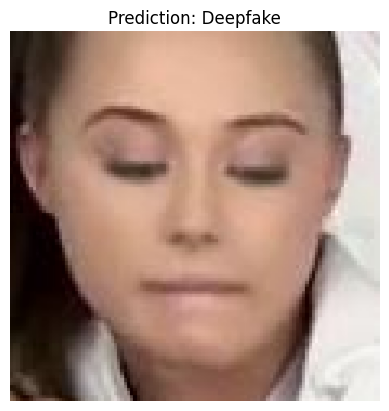

In [ ]:
# -------------------------------
# 📷 Step 4: Predict on Image
# -------------------------------
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    print(f"\n🔎 Prediction Score (0 = FAKE, 1 = REAL): {prediction:.4f}")
    if prediction < 0.5:
        print("⚠️ Deepfake Detected")
    else:
        print("✅ Image appears genuine")

    # Show image
    plt.imshow(img)
    plt.title(f"Prediction: {'Deepfake' if prediction < 0.5 else 'Real'}")
    plt.axis('off')
    plt.show()

# Example usage:
img_path = "/content/deepfake_project/Deepfake-detection/data/DeepFake/115_174.jpg"  # change as needed
predict_image(img_path, model)


In [ ]:
# --- IMPORTS ---
from PIL import Image, ImageChops, ExifTags
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, AveragePooling2D, Flatten, Dense

# --- MesoNet Definition ---
def Meso4():
    x = Input(shape=(256, 256, 3))
    y = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
    y = BatchNormalization()(y)
    y = AveragePooling2D(pool_size=(2, 2), padding='same')(y)
    y = Conv2D(8, (5, 5), padding='same', activation='relu')(y)
    y = BatchNormalization()(y)
    y = AveragePooling2D(pool_size=(2, 2), padding='same')(y)
    y = Conv2D(16, (5, 5), padding='same', activation='relu')(y)
    y = BatchNormalization()(y)
    y = AveragePooling2D(pool_size=(2, 2), padding='same')(y)
    y = Conv2D(16, (5, 5), padding='same', activation='relu')(y)
    y = BatchNormalization()(y)
    y = AveragePooling2D(pool_size=(4, 4), padding='same')(y)
    y = Flatten()(y)
    y = Dense(16, activation='relu')(y)
    y = Dense(1, activation='sigmoid')(y)
    return Model(inputs=x, outputs=y)

# --- Load Weights ---
model = Meso4()
model.load_weights("/content/deepfake_project/Deepfake-detection/weights/Meso4_DF.h5")
print("✅ MesoNet model loaded.")

# --- Metadata Extraction ---
def extract_metadata(image_path):
    image = Image.open(image_path)
    exif_data = image._getexif()
    metadata = {}
    if exif_data:
        for tag_id, value in exif_data.items():
            tag = ExifTags.TAGS.get(tag_id, tag_id)
            metadata[tag] = value
    return metadata

# --- ELA ---
def perform_ela(image_path, quality=90):
    temp_path = "temp_ela.jpg"
    original = Image.open(image_path).convert('RGB')
    original.save(temp_path, 'JPEG', quality=quality)
    ela_image = Image.open(temp_path)
    diff = ImageChops.difference(original, ela_image)
    diff = diff.point(lambda x: x * 10)
    diff.save("ela_output.jpg")
    return diff

# --- Brightness & Variance Check ---
def check_brightness_variance(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    brightness = np.mean(img)
    variance = np.var(img)
    return brightness, variance

# --- AI Deepfake Prediction ---
def predict_with_model(img_path, model):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    print(f"\n🤖 MesoNet Confidence Score (1=Real, 0=Fake): {prediction:.4f}")
    if prediction < 0.5:
        print("⚠️ Deepfake Detected by AI Model")
    else:
        print("✅ AI Model suggests this is Real")
    return prediction

# --- FULL PIPELINE ---
def full_pipeline(image_path):
    print("🔍 [Stage 1] Metadata + ELA Analysis")
    metadata = extract_metadata(image_path)
    suspicious = False

    # Heuristics
    if metadata:
        for key, value in metadata.items():
            if isinstance(value, str) and any(tool in value.lower() for tool in ['photoshop', 'gimp']):
                print(f" - Edited with: {value}")
                suspicious = True
    else:
        print("⚠️ No metadata found.")
        suspicious = True

    brightness, variance = check_brightness_variance(image_path)
    print(f"Brightness: {brightness:.2f}, Variance: {variance:.2f}")
    if brightness < 50 or variance > 2000:
        suspicious = True

    ela_img = perform_ela(image_path)
    plt.imshow(img)
    plt.title("ELA Visualization")
    plt.axis('off')
    plt.show()

    if suspicious:
        print("\n⚠️ Suspicious indicators found — escalating to AI analysis.")
        score = predict_with_model(image_path, model)
        return score
    else:
        print("\n✅ Stage 1 passed — no need for AI escalation.")
        return 1.0  # Fully trusted

# --- Run on Your Test Image ---
test_image = "/content/deepfake_project/Deepfake-detection/data/DeepFake/115_174.jpg"
final_score = full_pipeline(test_image)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/deepfake_project/Deepfake-detection/weights/Meso4_DF.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# **FAce detection**

In [ ]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set up face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

def detect_and_crop_faces(image_path, output_dir="/content/cropped_faces", padding=20):
    os.makedirs(output_dir, exist_ok=True)
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    cropped_paths = []

    print(f"🧠 Detected {len(faces)} face(s) in the image.")

    for i, (x, y, w, h) in enumerate(faces):
        # Expand the bounding box by the padding value
        x_start = max(x - padding, 0)  # Ensure it doesn't go out of bounds
        y_start = max(y - padding, 0)
        x_end = min(x + w + padding, image.shape[1])  # Ensure it doesn't exceed image width
        y_end = min(y + h + padding, image.shape[0])  # Ensure it doesn't exceed image height

        face_img = image[y_start:y_end, x_start:x_end]
        face_path = os.path.join(output_dir, f"face_{i}.jpg")
        cv2.imwrite(face_path, face_img)
        cropped_paths.append(face_path)

        # Optional: show detected face with padding
        plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Detected Face #{i+1}")
        plt.axis('off')
        plt.show()

    return cropped_paths


🧠 Detected 1 face(s) in the image.


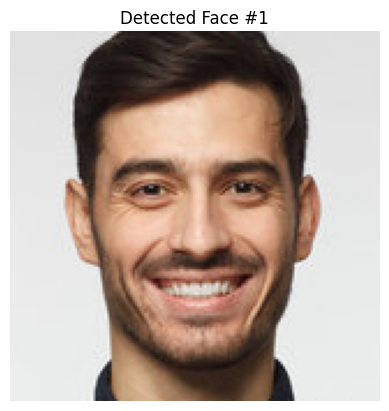

In [ ]:
cropped_faces = detect_and_crop_faces("/content/latest.jpg")


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

def run_deepfake_analysis_on_crops(crop_paths, model):
    for path in crop_paths:
        img = load_img(path, target_size=(256, 256))
        img = img_to_array(img) / 255.0
        img = np.expand_dims(img, axis=0)

        prediction = model.predict(img)[0][0]
        print(f"📍 {os.path.basename(path)} → Deepfake Confidence: {prediction:.4f}")

        if prediction >= 0.5:
            print("⚠️ Potential Deepfake Detected.")
        else:
            print("✅ Likely Authentic.")


Saving 177_42.jpg to 177_42.jpg
🧠 Detected 1 face(s).


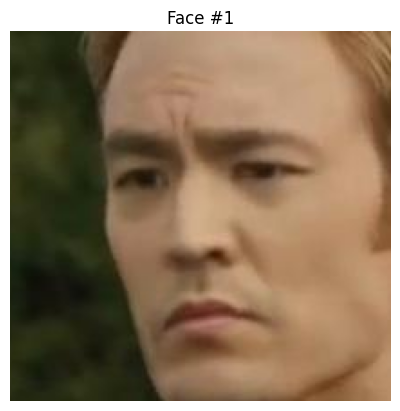


🖼️ Analyzing Face #1: face_0.jpg

🔎 Running Stage 1 (Metadata + ELA)...
⚠️ No metadata found.

📸 ELA:


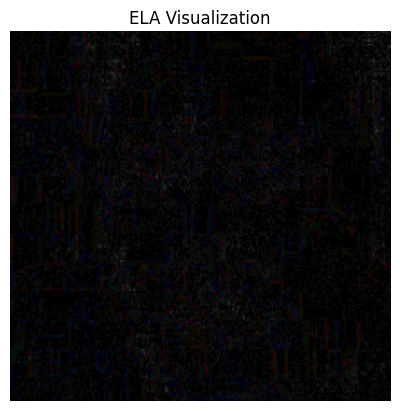

💡 Brightness: 105.81, Variance: 2513.22
✅ Stage 1 result: Suspicious
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
🧠 MesoNet prediction (0=Real, 1=Fake): 0.1142
✅ Face #1: Likely real with confidence 0.89

🧹 All temporary files cleaned up.


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image, ImageChops
from PIL.ExifTags import TAGS
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 1️⃣ Upload Image
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# 2️⃣ Detect & Crop Faces
def detect_and_crop_faces(image_path, output_dir="/content/cropped_faces", padding=20):
    os.makedirs(output_dir, exist_ok=True)
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    cropped_paths = []

    print(f"🧠 Detected {len(faces)} face(s).")

    for i, (x, y, w, h) in enumerate(faces):
        x_start = max(x - padding, 0)
        y_start = max(y - padding, 0)
        x_end = min(x + w + padding, image.shape[1])
        y_end = min(y + h + padding, image.shape[0])

        face_img = image[y_start:y_end, x_start:x_end]
        face_path = os.path.join(output_dir, f"face_{i}.jpg")
        cv2.imwrite(face_path, face_img)
        cropped_paths.append(face_path)

        plt.imshow(cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB))
        plt.title(f"Face #{i+1}")
        plt.axis('off')
        plt.show()

    return cropped_paths

face_crops = detect_and_crop_faces(image_path)

# 3️⃣ Stage 1: Metadata, ELA, Brightness/Variance
def extract_metadata(img_path):
    image = Image.open(img_path)
    exif_data = image._getexif()
    metadata = {}
    if exif_data:
        for tag_id, value in exif_data.items():
            tag = TAGS.get(tag_id, tag_id)
            metadata[tag] = value
    return metadata

def perform_ela(image_path, quality=90):
    temp_path = "temp_ela.jpg"
    original = Image.open(image_path).convert('RGB')
    original.save(temp_path, 'JPEG', quality=quality)
    ela_image = Image.open(temp_path)
    diff = ImageChops.difference(original, ela_image)
    diff = diff.point(lambda x: x * 10)
    diff.save("ela_output.jpg")
    return diff

def check_brightness_variance(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    brightness = np.mean(img)
    variance = np.var(img)
    return brightness, variance

def run_stage_1(img_path):
    print("\n🔎 Running Stage 1 (Metadata + ELA)...")
    suspicious = False

    metadata = extract_metadata(img_path)
    if metadata:
        for key, value in metadata.items():
            if isinstance(value, str) and any(tool in value.lower() for tool in ['photoshop', 'gimp']):
                print(f"⚠️ Edited with: {value}")
                suspicious = True
    else:
        print("⚠️ No metadata found.")
        suspicious = True

    print("\n📸 ELA:")
    ela_img = perform_ela(img_path)
    plt.imshow(ela_img)
    plt.title("ELA Visualization")
    plt.axis('off')
    plt.show()

    brightness, variance = check_brightness_variance(img_path)
    print(f"💡 Brightness: {brightness:.2f}, Variance: {variance:.2f}")
    if brightness < 50 or variance > 2000:
        suspicious = True

    print("✅ Stage 1 result:", "Suspicious" if suspicious else "Clean")
    return suspicious

# 4️⃣ Stage 2: MesoNet Analysis
def run_stage_2(face_path, model):
    img = load_img(face_path, target_size=(256, 256))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)[0][0]
    print(f"🧠 MesoNet prediction (0=Real, 1=Fake): {pred:.4f}")
    return pred

# 5️⃣ Run Pipeline
for i, crop in enumerate(face_crops):
    print(f"\n🖼️ Analyzing Face #{i+1}: {os.path.basename(crop)}")

    suspicious = run_stage_1(crop)

    if suspicious:
        confidence = run_stage_2(crop, model)
        if confidence >= 0.5:
            print(f"⚠️ Face #{i+1}: Deepfake detected with confidence {confidence:.2f}")
        else:
            print(f"✅ Face #{i+1}: Likely real with confidence {1 - confidence:.2f}")
    else:
        print(f"✅ Face #{i+1}: Clean in Stage 1, skipped AI analysis.")

# 6️⃣ Auto Cleanup (Optional)
import shutil
shutil.rmtree("/content/cropped_faces", ignore_errors=True)
os.remove(image_path)
os.remove("temp_ela.jpg")
os.remove("ela_output.jpg")
print("\n🧹 All temporary files cleaned up.")


Saving 177_42.jpg to 177_42.jpg
🧠 Detected 1 face(s).

--- 🔎 Analyzing /content/temp_sandbox/cropped_faces/face_0.jpg ---
🔍 Stage 1: Metadata / Heuristics
⚠️ No metadata found.
🔬 ELA output:


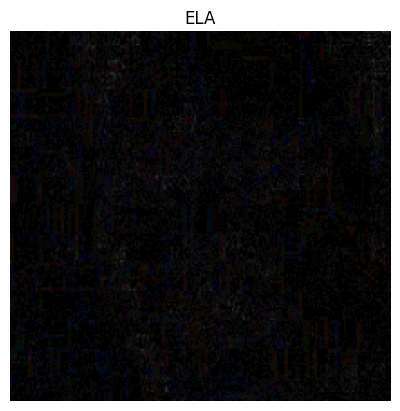

💡 Brightness: 105.81, Variance: 2513.22
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
🤖 AI Prediction: FAKE (0.52)

🧹 Sandbox + Uploaded Files Deleted.


In [ ]:
from google.colab import files
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
from PIL.ExifTags import TAGS
from keras.models import load_model
import tensorflow as tf
from keras import layers, models

# ========== 1. Upload ==========
uploaded = files.upload()
image_path = next(iter(uploaded.keys()))

# ========== 2. Create Sandbox ==========
SANDBOX = "/content/temp_sandbox"
os.makedirs(SANDBOX, exist_ok=True)

# ========== 3. Face Detection & Cropping ==========
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
CROP_DIR = os.path.join(SANDBOX, "cropped_faces")
os.makedirs(CROP_DIR, exist_ok=True)

def detect_and_crop_faces(image_path, padding=20):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    cropped_paths = []
    print(f"🧠 Detected {len(faces)} face(s).")
    for i, (x, y, w, h) in enumerate(faces):
        x1 = max(x - padding, 0)
        y1 = max(y - padding, 0)
        x2 = min(x + w + padding, image.shape[1])
        y2 = min(y + h + padding, image.shape[0])
        face_img = image[y1:y2, x1:x2]
        face_path = os.path.join(CROP_DIR, f"face_{i}.jpg")
        cv2.imwrite(face_path, face_img)
        cropped_paths.append(face_path)
    return cropped_paths

# ========== 4. Stage 1: Heuristics ==========
def extract_metadata(img_path):
    try:
        image = Image.open(img_path)
        exif_data = image._getexif()
        if not exif_data: return None
        return {TAGS.get(k, k): v for k, v in exif_data.items()}
    except Exception: return None

def perform_ela(img_path, quality=90):
    ela_temp = os.path.join(SANDBOX, "temp_ela.jpg")
    ela_out = os.path.join(SANDBOX, "ela_output.jpg")
    image = Image.open(img_path).convert('RGB')
    image.save(ela_temp, "JPEG", quality=quality)
    ela_image = Image.open(ela_temp)
    diff = ImageChops.difference(image, ela_image).point(lambda x: x * 10)
    diff.save(ela_out)
    return diff

def brightness_variance(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    return np.mean(img), np.var(img)

def run_stage_1(img_path):
    print("🔍 Stage 1: Metadata / Heuristics")
    suspicious = False
    meta = extract_metadata(img_path)
    if not meta:
        print("⚠️ No metadata found.")
        suspicious = True
    else:
        for k, v in meta.items():
            if isinstance(v, str) and any(t in v.lower() for t in ['photoshop', 'gimp']):
                print(f"⚠️ Edited with {v}")
                suspicious = True

    print("🔬 ELA output:")
    ela_img = perform_ela(img_path)
    plt.imshow(ela_img)
    plt.axis('off')
    plt.title("ELA")
    plt.show()

    brightness, variance = brightness_variance(img_path)
    print(f"💡 Brightness: {brightness:.2f}, Variance: {variance:.2f}")
    if brightness < 50 or variance > 2000:
        suspicious = True

    return suspicious

# ========== 5. Stage 2: MesoNet AI ==========
class Meso4:
    def __init__(self):
        self.model = self.init_model()

    def init_model(self):
        model = models.Sequential()
        model.add(layers.Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
        model.add(layers.Conv2D(8, (5, 5), padding='same', activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
        model.add(layers.Conv2D(16, (5, 5), padding='same', activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
        model.add(layers.Conv2D(16, (5, 5), padding='same', activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(pool_size=(4, 4), strides=4))
        model.add(layers.Flatten())
        model.add(layers.Dense(16, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(1, activation='sigmoid'))
        return model

    def load_weights(self, path):
        self.model.load_weights(path)

    def predict(self, img_path):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (256, 256)) / 255.0
        return self.model.predict(np.expand_dims(img, axis=0))[0][0]

meso = Meso4()
meso.load_weights("/content/deepfake_project/Deepfake-detection/weights/Meso4_DF.h5")

# ========== 6. Run Pipeline ==========
cropped_faces = detect_and_crop_faces(image_path)

if not cropped_faces:
    print("❌ No faces detected. Aborting.")
else:
    for face_img in cropped_faces:
        print(f"\n--- 🔎 Analyzing {face_img} ---")
        suspicious = run_stage_1(face_img)
        if suspicious:
            prob = meso.predict(face_img)
            label = "FAKE" if prob >= 0.5 else "REAL"
            print(f"🤖 AI Prediction: {label} ({prob:.2f})")
        else:
            print("✅ Clean image. No AI analysis required.")

# ========== 7. Cleanup ==========
shutil.rmtree(SANDBOX, ignore_errors=True)
for fname in uploaded.keys():
    os.remove(fname)
print("\n🧹 Sandbox + Uploaded Files Deleted.")


# **Stagee 4**

In [ ]:
!pip install web3 py-solc-x --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
# ===============================
# ⚙️ Install Dependencies
# ===============================
!pip install web3 py-solc-x --quiet

# ===============================
# 🔧 Connect to Ganache & Deploy Smart Contract
# ===============================
from web3 import Web3
from solcx import compile_source, install_solc

install_solc("0.8.0")

ganache_url = "http://127.0.0.1:7545"  # Replace with ngrok URL if needed
web3 = Web3(Web3.HTTPProvider(ganache_url))
assert web3.is_connected(), "❌ Failed to connect to Ethereum RPC."

web3.eth.default_account = web3.eth.accounts[0]

contract_source_code = '''
pragma solidity ^0.8.0;

contract DetectionLogger {
    struct Detection {
        bool exists;
        string result;
        uint confidence;
        uint timestamp;
    }

    mapping(bytes32 => Detection) public detections;

    function logDetection(bytes32 fileHash, string memory result, uint confidence) public {
        require(!detections[fileHash].exists, "Already logged");
        detections[fileHash] = Detection(true, result, confidence, block.timestamp);
    }

    function getDetection(bytes32 fileHash) public view returns (bool, string memory, uint, uint) {
        Detection memory d = detections[fileHash];
        return (d.exists, d.result, d.confidence, d.timestamp);
    }
}
'''

compiled_sol = compile_source(contract_source_code, output_values=["abi", "bin"])
contract_id, contract_interface = compiled_sol.popitem()
abi = contract_interface['abi']
bytecode = contract_interface['bin']

DetectionLogger = web3.eth.contract(abi=abi, bytecode=bytecode)
tx_hash = DetectionLogger.constructor().transact()
tx_receipt = web3.eth.wait_for_transaction_receipt(tx_hash)

contract = web3.eth.contract(address=tx_receipt.contractAddress, abi=abi)
print(f"✅ Smart contract deployed at: {tx_receipt.contractAddress}")

# ===============================
# 🔐 Utility Functions
# ===============================
import hashlib
import time

def sha256_of_file(file_path):
    with open(file_path, "rb") as f:
        return hashlib.sha256(f.read()).hexdigest()

def log_detection_to_blockchain(file_path, result: str, confidence: int):
    file_hash = sha256_of_file(file_path)
    file_hash_bytes32 = web3.keccak(hexstr=file_hash)
    try:
        tx = contract.functions.logDetection(file_hash_bytes32, result, confidence).transact()
        web3.eth.wait_for_transaction_receipt(tx)
        print("✅ Detection logged to blockchain.")
    except Exception as e:
        print(f"⚠️ Logging failed: {e}")

def check_detection_on_blockchain(file_path):
    file_hash = sha256_of_file(file_path)
    file_hash_bytes32 = web3.keccak(hexstr=file_hash)
    exists, result, confidence, timestamp = contract.functions.getDetection(file_hash_bytes32).call()
    if exists:
        print("🧾 Detection Found:")
        print(f" - Result     : {result}")
        print(f" - Confidence : {confidence}")
        print(f" - Timestamp  : {time.ctime(timestamp)}")
    else:
        print("❌ No record found on blockchain.")

# ===============================
# 📂 Example Usage
# ===============================
# Replace with the actual cropped face image path
file_path = "/content/cropped_faces/face_0.jpg"

# Check existing log
check_detection_on_blockchain(file_path)

# Log new result if needed
result = "FAKE"
confidence = 92
log_detection_to_blockchain(file_path, result, confidence)


AssertionError: ❌ Failed to connect to Ethereum RPC.

In [ ]:
# Deepfake Detection - Full Pipeline with Privacy + Blockchain Logging

import os
import cv2
import hashlib
import time
import shutil
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageChops, ExifTags
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from web3 import Web3

# ---------------------------
# Setup: Blockchain + Web3
# ---------------------------
w3 = Web3(Web3.HTTPProvider("http://127.0.0.1:7545"))  # Ganache
contract_address = Web3.to_checksum_address("")
abi = [...]  # Paste your contract ABI here
contract = w3.eth.contract(address=contract_address, abi=abi)
w3.eth.default_account = w3.eth.accounts[0]

# ---------------------------
# Helper: Hashing
# ---------------------------
def hash_file(file_path):
    with open(file_path, 'rb') as f:
        return hashlib.sha256(f.read()).hexdigest()

# ---------------------------
# Stage 1: Lightweight Checks
# ---------------------------
def extract_metadata(image_path):
    image = Image.open(image_path)
    exif_data = image._getexif()
    metadata = {}
    if exif_data:
        for tag_id, value in exif_data.items():
            tag = ExifTags.TAGS.get(tag_id, tag_id)
            metadata[tag] = value
    return metadata

def perform_ela(image_path, quality=90):
    temp_path = "temp_ela.jpg"
    original = Image.open(image_path).convert('RGB')
    original.save(temp_path, 'JPEG', quality=quality)
    ela_image = Image.open(temp_path)
    diff = ImageChops.difference(original, ela_image)
    diff = diff.point(lambda x: x * 10)
    return diff

def check_brightness_variance(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    brightness = np.mean(img)
    variance = np.var(img)
    return brightness, variance

def run_stage_1(image_path):
    suspicious = False
    metadata = extract_metadata(image_path)
    if not metadata:
        suspicious = True
    else:
        for value in metadata.values():
            if isinstance(value, str) and any(tool in value.lower() for tool in ['photoshop', 'gimp']):
                suspicious = True

    brightness, variance = check_brightness_variance(image_path)
    if brightness < 50 or variance > 2000:
        suspicious = True

    return suspicious

# ---------------------------
# Face Detection + Crop
# ---------------------------
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_and_crop_faces(image_path, output_dir="/content/cropped_faces", padding=20):
    os.makedirs(output_dir, exist_ok=True)
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    cropped_paths = []

    for i, (x, y, w, h) in enumerate(faces):
        x1, y1 = max(x - padding, 0), max(y - padding, 0)
        x2, y2 = min(x + w + padding, image.shape[1]), min(y + h + padding, image.shape[0])
        face_img = image[y1:y2, x1:x2]
        out_path = os.path.join(output_dir, f"face_{i}.jpg")
        cv2.imwrite(out_path, face_img)
        cropped_paths.append(out_path)

    return cropped_paths

# ---------------------------
# Stage 2: MesoNet Inference
# ---------------------------
class Meso4:
    def __init__(self):
        from keras.models import Sequential
        from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
        model = Sequential()
        model.add(Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(256,256,3)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Conv2D(8, (5,5), padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Conv2D(16, (5,5), padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Conv2D(16, (5,5), padding='same', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(4,4)))
        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(16, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        self.model = model

    def load(self, weights_path):
        self.model.load_weights(weights_path)

    def predict(self, face_path):
        img = cv2.imread(face_path)
        img = cv2.resize(img, (256, 256))
        img = img_to_array(img) / 255.
        pred = self.model.predict(np.expand_dims(img, axis=0))[0][0]
        return pred

# ---------------------------
# Blockchain Logging
# ---------------------------
def log_to_blockchain(file_hash, result, confidence):
    tx = contract.functions.logDetection(file_hash, result, confidence).transact()
    receipt = w3.eth.wait_for_transaction_receipt(tx)
    print("🔗 Logged to blockchain:", receipt.transactionHash.hex())

# ---------------------------
# Final Integration
# ---------------------------
def run_pipeline(image_path):
    print("\n📥 Processing:", image_path)
    suspicious = run_stage_1(image_path)
    cropped_faces = detect_and_crop_faces(image_path)
    if not cropped_faces:
        print("⚠️ No faces detected. Cannot proceed.")
        return

    model = Meso4()
    model.load("/content/deepfake_project/Deepfake-detection/weights/Meso4_DF")
    for face_path in cropped_faces:
        score = model.predict(face_path)
        label = "FAKE" if score > 0.5 else "REAL"
        conf = int(score * 100) if label == "FAKE" else int((1 - score) * 100)
        fhash = hash_file(face_path)
        print(f"🧠 Result: {label} ({conf}%)")
        log_to_blockchain(fhash, label, conf)

    # Cleanup
    shutil.rmtree("/content/cropped_faces", ignore_errors=True)
    os.remove(image_path)
    print("🧹 Cleaned up files.")
